# In this notebook, we assemble Figure 5 transcription factor importance boxplot for the TwinC paper. 

In [3]:
import os
import mne
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pyjaspar import jaspardb
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from matplotlib.colors import hsv_to_rgb

if not os.path.exists(f"../../figures"):
    os.system(f"mkdir ../../figures")
else:
    print(f"figures directory exists")

if not os.path.exists(f"../../figures/tf_analysis"):
    os.system(f"mkdir ../../figures/tf_analysis")
else:
    print(f"tf_analysis figures directory exists")

figures directory exists


enriched_tfs: 3.283577298835756e-06
depleted_tfs: 1.3884558812824819e-07
112 492
mwu p-value: 1.4120139697097105e-27
mwu AUROC: 0.8272357723577236


/tmp/ipykernel_1959847/2041204867.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels([f"Enriched TF motifs \n(n={len(enriched_tfs)})", f"Other TF motifs \n(n={len(depleted_tfs)})"])


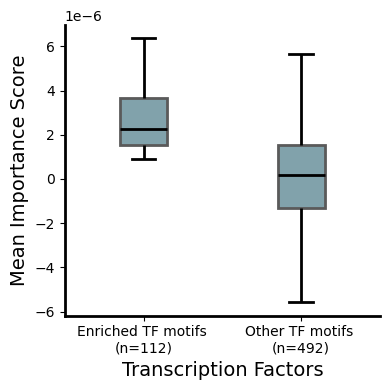

In [4]:
avg_attrs_np_common = pd.read_csv("../../results/tf_analysis/tf_plot_motifs.csv")

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rcParams['axes.facecolor']='white'
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)    
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

# Define HSL values
hue = 193
saturation = 32
lightness = 70

hue /= 360
saturation /= 100
lightness /= 100

# Convert HSL to RGB
rgb_color = hsv_to_rgb((hue, saturation, lightness))

figure, axis = plt.subplots(1, 1, figsize=(4, 4))

for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(2)

sns.boxplot(data=avg_attrs_np_common, 
            x="Transcription Factors", 
            y="Average Attribution", 
            fill=True, 
            color=rgb_color, 
            width=0.3, 
            linewidth=2, 
            showfliers=False,
            #boxprops=dict(color="black"),      
            whiskerprops=dict(color="black"),  
            capprops=dict(color="black"),    
            medianprops=dict(color="black"))

enriched_tfs = avg_attrs_np_common[avg_attrs_np_common['Transcription Factors'] == "enriched"]['Average Attribution'].to_list()
depleted_tfs = avg_attrs_np_common[avg_attrs_np_common['Transcription Factors'] == "other"]['Average Attribution'].to_list()

print(f"enriched_tfs: {np.mean(enriched_tfs)}")
print(f"depleted_tfs: {np.mean(depleted_tfs)}")

print(len(enriched_tfs), len(depleted_tfs))
mwu = stats.mannwhitneyu(enriched_tfs, depleted_tfs, alternative="greater")
auc_mu = mwu[0]/(len(enriched_tfs)*len(depleted_tfs))
print(f"mwu p-value: {mwu[1]}")
print(f"mwu AUROC: {auc_mu}")


axis.set_xticklabels([f"Enriched TF motifs \n(n={len(enriched_tfs)})", f"Other TF motifs \n(n={len(depleted_tfs)})"])
axis.set_ylabel(f"Mean Importance Score")
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("../../figures/tf_analysis/tf_importance_all.pdf", transparent=True)
plt.show()